In [25]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [26]:
def spotify(client_id, client_secret):
    # Authenticate
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    return sp

# Set up the credentials
with open('config.json') as config_file:
    config = json.load(config_file)

client_id = config['client_id']['0']
client_secret = config['client_secret']['0']

sp = spotify(client_id, client_secret)


In [27]:
def fetch_playlist_songs(playlist_id, genre):
    """
    Fetches details of songs from a Spotify playlist, including audio features.
    
    Args:
    - playlist_id (str): The ID of the Spotify playlist.
    - genre (int): The genre of thecvb playlist.
    
    Returns:
    - pd.DataFrame: A DataFrame containing the track names, audio features, and genre.
    """
    
    # Get playlist details using the playlist ID
    playlist = sp.playlist(playlist_id)
    
    # Get the list of track IDs from the playlist
    track_ids = [track['track']['id'] for track in playlist['tracks']['items'] if track['track'] and track['track']['id']]
    
    # Fetch audio features for each track in chunks of 100
    def fetch_audio_features(track_ids):
        audio_features = []
        for i in range(0, len(track_ids), 100):
            chunk = track_ids[i:i+100]
            audio_features.extend(sp.audio_features(chunk))
        return audio_features
    
    # Fetch audio features for each track
    audio_features = fetch_audio_features(track_ids)
    
    # Filter out None values from audio features
    audio_features = [feature for feature in audio_features if feature is not None]
    
    # Create a DataFrame to store the audio features
    df_songs = pd.DataFrame(audio_features)
    
    # Add track names to the DataFrame for better readability
    track_names = [track['track']['name'] for track in playlist['tracks']['items'] if track['track'] and track['track']['id'] in [feature['id'] for feature in audio_features]]
    df_songs['track_name'] = track_names
    
    # Reorder columns to have track_name first
    df_songs = df_songs[['track_name'] + [col for col in df_songs.columns if col != 'track_name']]
    
    # Add a new column 'genre' with all values set to 2
    df_songs['genre'] = genre

    return df_songs

In [28]:
#Create training set
df_rap = fetch_playlist_songs("7EnIitpBIDp8hbqoaOWfQO", "Rap")
df_rnb = fetch_playlist_songs("6qtKKhlFHArOINqDBDlwc4", "RnB")
df_classical = fetch_playlist_songs("4Yz4OxGaJ6ap2BUKR4ELSZ", "Classical")
df_cover = fetch_playlist_songs("5fPDWsuu7rjLdrfLkJP0mm", "Covers")
#df_edm = fetch_playlist_songs("1IjelnEHVvg008UVRbbSN5", "EDM")
df_old = fetch_playlist_songs("6ql89RtWvIJwcpCFVxBhMz", "Old")
df_easy = fetch_playlist_songs("7HHvu8J7giOG5UtydKDUaG", "Easy")

#combine all genres
df_combined = pd.concat([df_rap, df_rnb, df_classical, df_cover, df_old, df_easy], ignore_index=True)
#convert to csv
df_combined.to_csv('test.csv')

In [22]:
# counts
df_combined.genre.value_counts()

genre
Rap          100
Classical    100
Covers       100
Old          100
RnB           90
Easy          89
Name: count, dtype: int64

In [23]:
# drop uri, track_href & analysis_url
# df_combined.columns
# df_combined = df_combined.drop(columns=['uri', 'track_href', 'analysis_url', 'type'])
df_combined

,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,Not Like Us,0.898,0.472,1,-7.001,1,0.0776,0.01070,0.000000,0.141,0.214,101.061,audio_features,6AI3ezQ4o3HUoP6Dhudph3,spotify:track:6AI3ezQ4o3HUoP6Dhudph3,https://api.spotify.com/v1/tracks/6AI3ezQ4o3HU...,https://api.spotify.com/v1/audio-analysis/6AI3...,274192,4,Rap
1,Like That,0.814,0.676,11,-4.670,0,0.2310,0.00709,0.000013,0.119,0.312,162.012,audio_features,2tudvzsrR56uom6smgOcSf,spotify:track:2tudvzsrR56uom6smgOcSf,https://api.spotify.com/v1/tracks/2tudvzsrR56u...,https://api.spotify.com/v1/audio-analysis/2tud...,267707,4,Rap
2,Breathe,0.760,0.546,11,-13.092,1,0.0616,0.02840,0.924000,0.103,0.113,118.051,audio_features,5NAOhPAZ57eFAXr3qatS6i,spotify:track:5NAOhPAZ57eFAXr3qatS6i,https://api.spotify.com/v1/tracks/5NAOhPAZ57eF...,https://api.spotify.com/v1/audio-analysis/5NAO...,170847,4,Rap
3,BANDIT,0.686,0.733,2,-5.268,1,0.0576,0.00567,0.000000,0.246,0.141,130.095,audio_features,3jRNIvRWw7vdtoMY2hb0Wt,spotify:track:3jRNIvRWw7vdtoMY2hb0Wt,https://api.spotify.com/v1/tracks/3jRNIvRWw7vd...,https://api.spotify.com/v1/audio-analysis/3jRN...,147747,4,Rap
4,CARNIVAL,0.594,0.811,1,-5.746,1,0.1590,0.18900,0.000000,0.339,0.311,148.144,audio_features,3w0w2T288dec0mgeZZqoNN,spotify:track:3w0w2T288dec0mgeZZqoNN,https://api.spotify.com/v1/tracks/3w0w2T288dec...,https://api.spotify.com/v1/audio-analysis/3w0w...,264324,4,Rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,Sky is the Limit,0.519,0.256,4,-14.184,1,0.0444,0.89100,0.000000,0.181,0.281,122.715,audio_features,1OBK4DltPHWoeilauCyckU,spotify:track:1OBK4DltPHWoeilauCyckU,https://api.spotify.com/v1/tracks/1OBK4DltPHWo...,https://api.spotify.com/v1/audio-analysis/1OBK...,159345,4,Easy
575,4EVER,0.750,0.585,9,-7.576,0,0.0285,0.04900,0.005520,0.155,0.584,102.331,audio_features,5mIOsPuQdXchVY0jB5NO9Q,spotify:track:5mIOsPuQdXchVY0jB5NO9Q,https://api.spotify.com/v1/tracks/5mIOsPuQdXch...,https://api.spotify.com/v1/audio-analysis/5mIO...,159595,4,Easy
576,Liability,0.587,0.229,10,-11.254,0,0.1280,0.92000,0.000000,0.100,0.379,75.670,audio_features,6Kkt27YmFyIFrcX3QXFi2o,spotify:track:6Kkt27YmFyIFrcX3QXFi2o,https://api.spotify.com/v1/tracks/6Kkt27YmFyIF...,https://api.spotify.com/v1/audio-analysis/6Kkt...,171728,4,Easy
577,Chinese Satellite,0.302,0.444,10,-9.948,1,0.0453,0.75400,0.024400,0.152,0.379,120.026,audio_features,60zlkOrTCHjpRTd1g6PI5y,spotify:track:60zlkOrTCHjpRTd1g6PI5y,https://api.spotify.com/v1/tracks/60zlkOrTCHjp...,https://api.spotify.com/v1/audio-analysis/60zl...,217070,4,Easy


NameError: name 'genre' is not defined

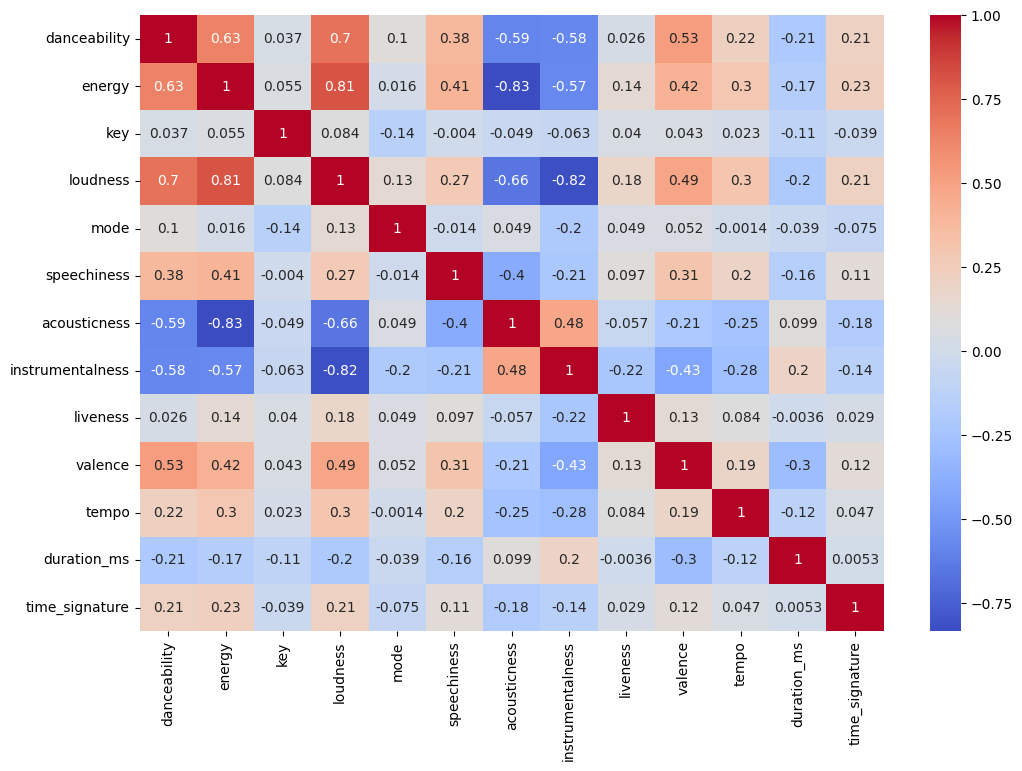

In [24]:
# correlation matrix
corr_matrix = df_combined.select_dtypes('number').corr()
    
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(f'Correlation Matrix for Genre {genre}')
plt.show()

In [ ]:
df = df_combined

# List of columns to plot
columns_to_plot = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'duration_ms', 'time_signature'
]

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 5 * len(columns_to_plot)))

# Plot each feature based on genre
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x='genre', y=column, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {column} by Genre')

# Adjust layout
plt.tight_layout()
plt.show()

# Create violin plots for the same data
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 5 * len(columns_to_plot)))

for i, column in enumerate(columns_to_plot):
    sns.violinplot(x='genre', y=column, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {column} by Genre')

# Adjust layout
plt.tight_layout()
plt.show()
